In [1]:
# torch and math  
import torch
from torch import Tensor
import math
from torch import nn
from torch.nn import functional as F
import numpy as np

# data and vizualisation
from helpers import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Parameters
nb_samples = 1000 

In [3]:
# generate the data
train_input, train_target, test_input, test_target = generate_disc_data(nb_samples, one_hot_labels = False, normalize = True)

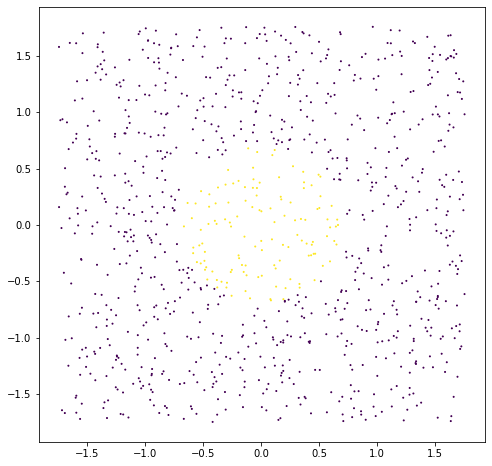

In [4]:
plot_disc_data(train_input, train_target, one_hot_labels = False)

In [5]:
def model_creation():
    model_1 = nn.Sequential(
    nn.Linear(2, 25),nn.ReLU(),
    nn.Linear(25, 25),nn.ReLU(),
    nn.Linear(25, 25),nn.ReLU(),
    nn.Linear(25, 25),nn.ReLU(),
    nn.Tanh(),nn.Linear(25,2)
    );
    return model_1

In [31]:
def SGD_optimizer(parameter):
    eta = 0.1
    return torch.optim.SGD(parameter, lr = eta)

In [61]:
nb_samples,epochs = 1000, 1000
batch_size = 100
validation_ratio , validation_rounds = 0.1 , 10
one_hot_labels,show_training= False, False
result ,loss_feedback, time_feedback = evaluate_model(model_creation,train_SGD_full_batch,SGD_optimizer,nb_samples, epochs, batch_size, validation_ratio, validation_rounds,one_hot_labels,show_training)

Train error = 0.0 Validation error = 1.0 Test error = 1.1
Train error = 0.1111111111111111 Validation error = 0.0 Test error = 0.4
Train error = 0.0 Validation error = 1.0 Test error = 0.4
Train error = 0.1111111111111111 Validation error = 0.0 Test error = 0.9
Train error = 0.1111111111111111 Validation error = 0.0 Test error = 0.4
Train error = 0.1111111111111111 Validation error = 0.0 Test error = 0.5
Train error = 0.1111111111111111 Validation error = 3.0 Test error = 1.2
Train error = 0.0 Validation error = 2.0 Test error = 1.0
Train error = 0.0 Validation error = 0.0 Test error = 0.4
Train error = 0.2222222222222222 Validation error = 2.0 Test error = 0.4


In [58]:
loss_feedback[:,-1]

array([0.09193724, 0.01955501, 0.07190795, 0.01558318, 0.00885875,
       0.0862177 , 0.10248253, 0.07573064, 0.00706666, 0.05139687])

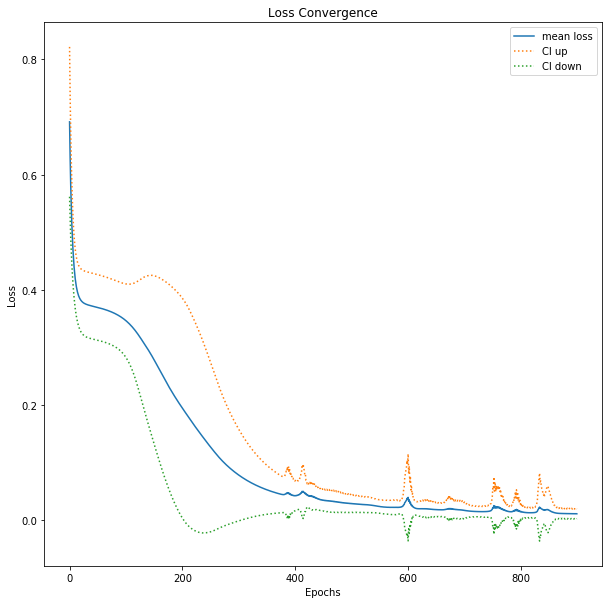

In [20]:
convergence_vizualisation(loss_feedback)

In [45]:
def time_vizualisation(loss_feedback , time_feedback):
    mean_loss = np.mean(loss_feedback,0)
    mean_time = np.mean(time_feedback,0)
    plt.figure(figsize=(10,10))
    plt.plot(np.cumsum(mean_time, dtype=float),mean_loss,marker = 'x')
    plt.yscale("log")

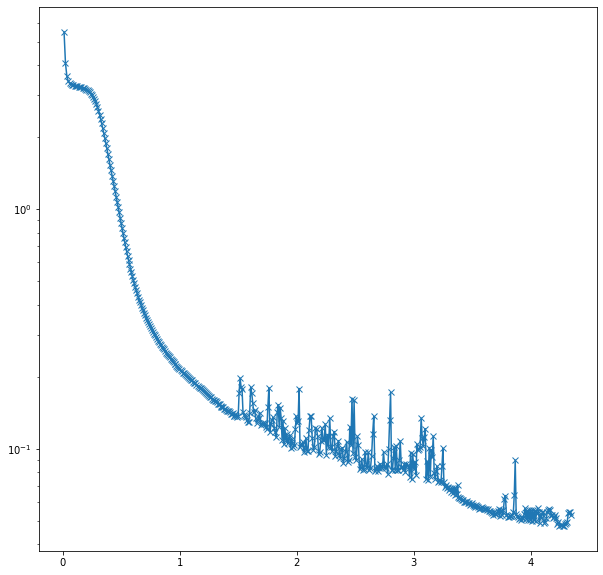

In [59]:
time_vizualisation(loss_feedback , time_feedback)

In [52]:
def LBFGS_optimizer(parameter):
    lr=0.8
    max_iter=10
    max_eval=None
    tolerance_grad=1e-07
    tolerance_change=1e-09
    history_size=7
    line_search_fn='strong_wolfe'
    return torch.optim.LBFGS(parameter, lr, max_iter, max_eval, tolerance_grad, tolerance_change, history_size, line_search_fn)

In [53]:
nb_samples,epochs = 1000, 40
eta, batch_size = 0.1 , 100
validation_ratio , validation_rounds = 0.1 , 10
one_hot_labels,show_training= False, False
result ,loss_feedback ,time_feedback  = evaluate_model(model_creation,train_LBFGS,LBFGS_optimizer,nb_samples, epochs, batch_size, validation_ratio, validation_rounds,one_hot_labels,show_training)

Train error = 0.0 Validation error = 0.0 Test error = 0.5
Train error = 0.0 Validation error = 1.0 Test error = 0.8
Train error = 0.0 Validation error = 2.0 Test error = 0.3
Train error = 0.0 Validation error = 0.0 Test error = 0.7
Train error = 0.0 Validation error = 0.0 Test error = 0.8
Train error = 0.0 Validation error = 1.0 Test error = 0.8
Train error = 0.0 Validation error = 0.0 Test error = 1.1
Train error = 0.0 Validation error = 0.0 Test error = 1.0
Train error = 0.0 Validation error = 1.0 Test error = 1.0
Train error = 0.0 Validation error = 1.0 Test error = 1.1


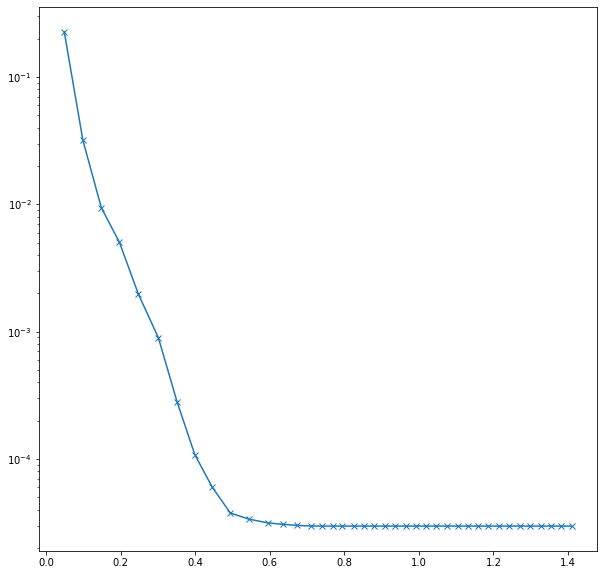

In [54]:
time_vizualisation(loss_feedback , time_feedback)

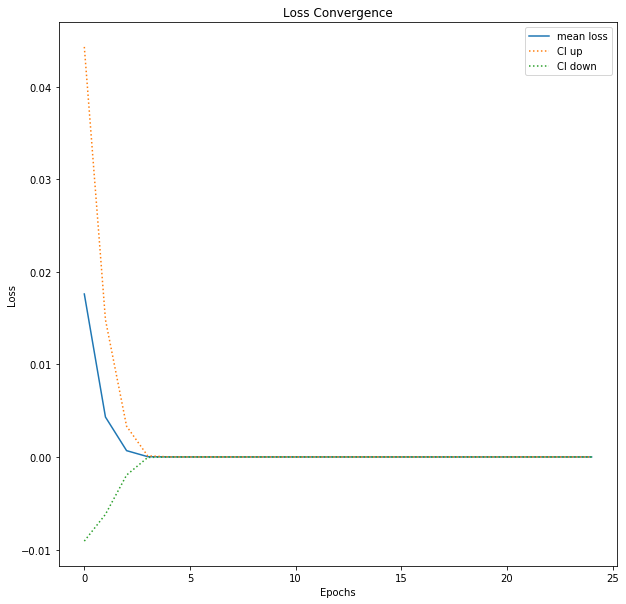

In [19]:
convergence_vizualisation(loss_feedback)

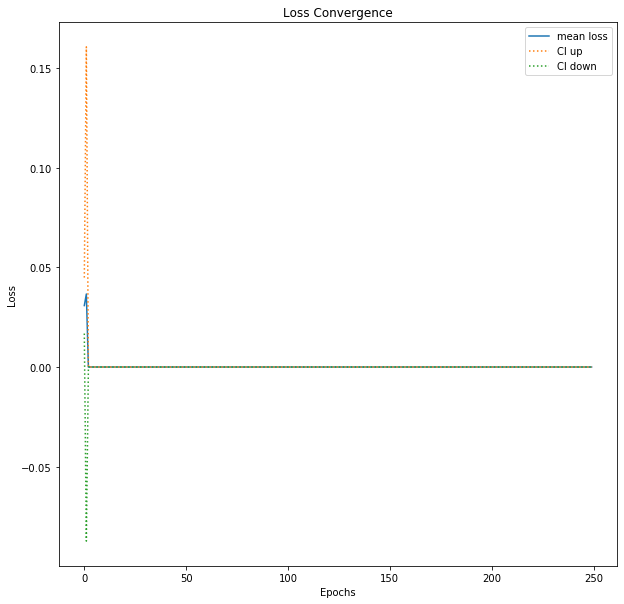

In [9]:
convergence_vizualisation(loss_feedback[4:8])
